In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
cancer_data = pd.read_csv("lung_cancer_prediction_dataset.csv")
cancer_data.head()

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,None,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,None,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,None,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,None,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,None,Developing,15000,2.44,0.0


In [3]:
pollution_data = pd.read_csv("global_air_pollution_dataset.csv")
pollution_data.head()

,Country,City,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


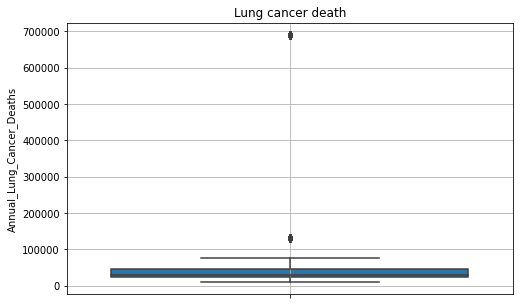

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=cancer_data['Annual_Lung_Cancer_Deaths'])
plt.title("Lung cancer death")
plt.grid()
plt.show()

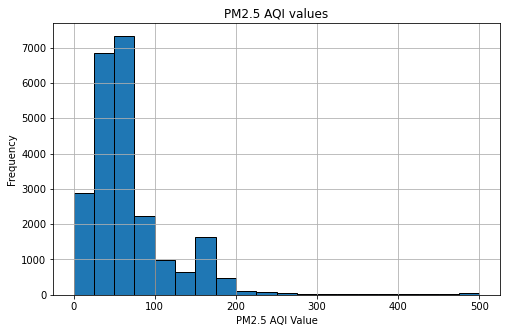

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(pollution_data['PM2.5_AQI_Value'], bins=20, edgecolor="black")
plt.xlabel("PM2.5 AQI Value")
plt.ylabel("Frequency")
plt.title("PM2.5 AQI values")
plt.grid()
plt.show()

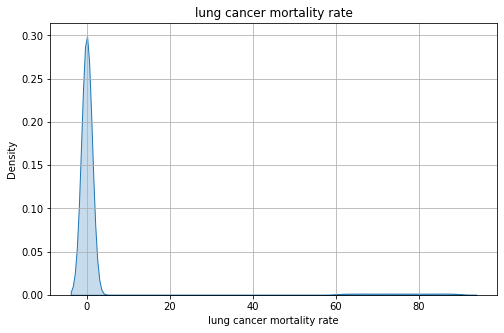

In [6]:
plt.figure(figsize=(8, 5))
sns.kdeplot(cancer_data['Mortality_Rate'], fill=True)
plt.xlabel("lung cancer mortality rate")
plt.ylabel("Density")
plt.title("lung cancer mortality rate")
plt.grid()
plt.show()

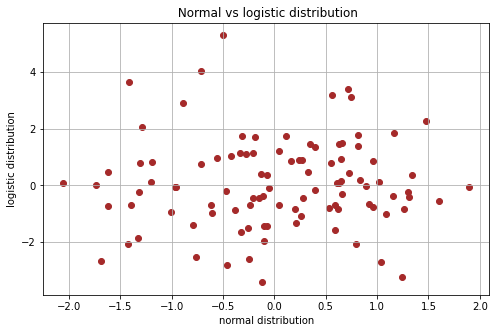

In [7]:
normal_values = np.random.normal(loc=0, scale=1, size=100)
logistic_values = np.random.logistic(loc=0, scale=1, size=100)

plt.figure(figsize=(8, 5))
plt.scatter(normal_values, logistic_values, color='brown')
plt.xlabel("normal distribution")
plt.ylabel("logistic distribution")
plt.title(" Normal vs logistic distribution")
plt.grid()

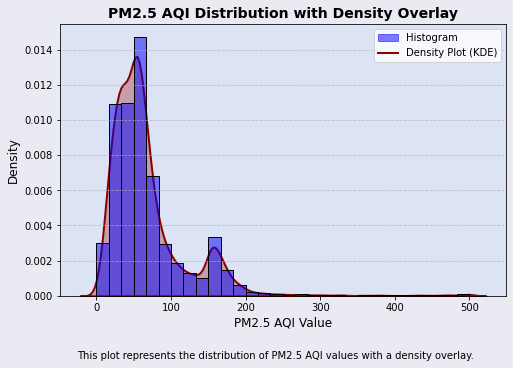

In [15]:
aqi_values = pollution_data['PM2.5_AQI_Value'].dropna()

fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor("#eaeaf2")   
ax.set_facecolor("#dce3f5")  

sns.histplot(aqi_values, bins=30, kde=False, color="blue", alpha=0.5, stat="density", label="Histogram", ax=ax)
sns.kdeplot(aqi_values, color="darkred", linewidth=2, label="Density Plot (KDE)", fill=True, alpha=0.3, ax=ax)

ax.set_title("PM2.5 AQI Distribution with Density Overlay", fontsize=14, fontweight='bold')
ax.set_xlabel("PM2.5 AQI Value", fontsize=12)
ax.set_ylabel("Density", fontsize=12)

ax.legend(handles=[mpatches.Patch(color="blue", alpha=0.5, label="Histogram"), 
                   Line2D([0], [0], color="darkred", linewidth=2, label="Density Plot (KDE)")])

ax.grid(axis="y", linestyle="--", alpha=0.7)
fig.text(0.5, -0.05, "This plot represents the distribution of PM2.5 AQI values with a density overlay.", wrap=True, ha="center", fontsize=10)

plt.show()
